In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 256
batch_size = 32
channels = 3
EPOCHS  = 20

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Dataset/Train",
shuffle = True,
image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size =batch_size)

Found 61200 files belonging to 36 classes.


In [4]:
class_names = dataset.class_names

In [5]:
class_names

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha']

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


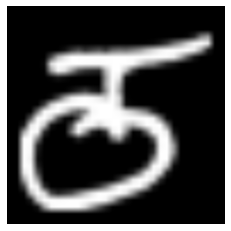

In [7]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

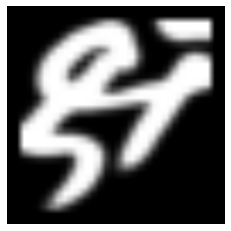

In [8]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[10].numpy().astype("uint8"))
    plt.axis("off")

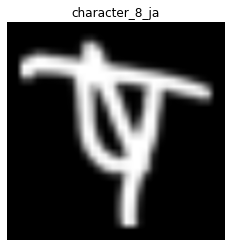

In [9]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[10].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

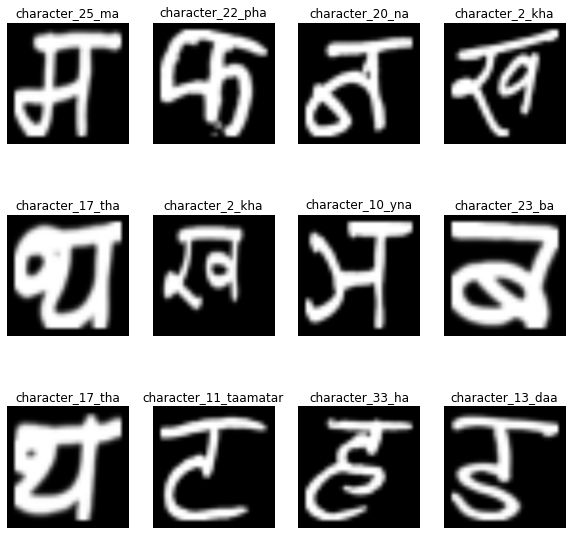

In [10]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [11]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split = 0.1,test_split=0.1,shuffle=True,shuffle_size = 100):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 20)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [12]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [13]:
resize_and_rescale =  tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [14]:
data_argumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [15]:
input_shape = (batch_size,IMAGE_SIZE,IMAGE_SIZE,channels)
n_classes = 36

model = models.Sequential([
     resize_and_rescale,
     data_argumentation,
     
     layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,kernel_size = (3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
     
     layers.Conv2D(64,(3,3),activation='relu'),
     layers.MaxPooling2D((2,2)),
    
     layers.Flatten(), 
     
     layers.Dense(64,activation='relu'),
     layers.Dense(n_classes,activation='softmax')
     
 ])
model.build(input_shape=input_shape)

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [17]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] 
)

In [18]:
len(train_ds)

1530

In [25]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=3, verbose=2, mode='auto',
    baseline=None, restore_best_weights=True
)

In [26]:
%%time
histroy = model.fit(train_ds,epochs=40,batch_size = 64,validation_data =val_ds,callbacks=[early_stopping])

Epoch 1/40
1530/1530 [==============================] - 252s 165ms/step - loss: 2.1610 - accuracy: 0.3700 - val_loss: 1.5887 - val_accuracy: 0.5260
Epoch 2/40
1530/1530 [==============================] - 200s 131ms/step - loss: 1.3219 - accuracy: 0.6068 - val_loss: 1.0156 - val_accuracy: 0.7107
Epoch 3/40
1530/1530 [==============================] - 201s 131ms/step - loss: 1.0430 - accuracy: 0.6880 - val_loss: 0.9009 - val_accuracy: 0.7349
Epoch 4/40
1530/1530 [==============================] - 203s 133ms/step - loss: 0.9063 - accuracy: 0.7281 - val_loss: 0.7680 - val_accuracy: 0.7709
Epoch 5/40
1530/1530 [==============================] - 196s 128ms/step - loss: 0.8122 - accuracy: 0.7549 - val_loss: 0.7066 - val_accuracy: 0.7916
Epoch 6/40
1530/1530 [==============================] - 193s 126ms/step - loss: 0.7414 - accuracy: 0.7742 - val_loss: 0.6584 - val_accuracy: 0.8032
Epoch 7/40
1530/1530 [==============================] - 203s 133ms/step - loss: 0.6963 - accuracy: 0.7889 - val_

In [27]:
scores = model.evaluate(test_ds)

192/192 [==============================] - 10s 50ms/step - loss: 0.3601 - accuracy: 0.8892


In [28]:
scores

[0.3600834310054779, 0.8891971111297607]

In [29]:
histroy

In [30]:
histroy.params

{'verbose': 1, 'epochs': 40, 'steps': 1530}

In [31]:
histroy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
histroy.history['accuracy']

[0.36999592185020447,
 0.6067606210708618,
 0.6880106329917908,
 0.7281454205513,
 0.7549019455909729,
 0.7742238640785217,
 0.7888684868812561,
 0.8010824918746948,
 0.813112735748291,
 0.8185865879058838,
 0.8267157077789307,
 0.8323937654495239,
 0.8369689583778381,
 0.8415237069129944,
 0.8458741903305054,
 0.846834123134613,
 0.8522671461105347,
 0.855004072189331,
 0.8578227162361145,
 0.8611315488815308,
 0.8619893789291382,
 0.8654412031173706,
 0.8684436082839966,
 0.8720179796218872]

In [33]:
histroy.history['loss']

[2.160975694656372,
 1.3219386339187622,
 1.04297935962677,
 0.9062907099723816,
 0.8122336864471436,
 0.7414412498474121,
 0.6962838768959045,
 0.653995156288147,
 0.6152550578117371,
 0.5939966440200806,
 0.5728988647460938,
 0.5514901876449585,
 0.5345059633255005,
 0.5175679922103882,
 0.5037270784378052,
 0.4962954521179199,
 0.4815746545791626,
 0.47330421209335327,
 0.46557801961898804,
 0.4516615569591522,
 0.44512996077537537,
 0.43787938356399536,
 0.4286259412765503,
 0.4189976453781128]

In [34]:
acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']

loss = histroy.history['loss']
val_loss = histroy.history['val_loss']

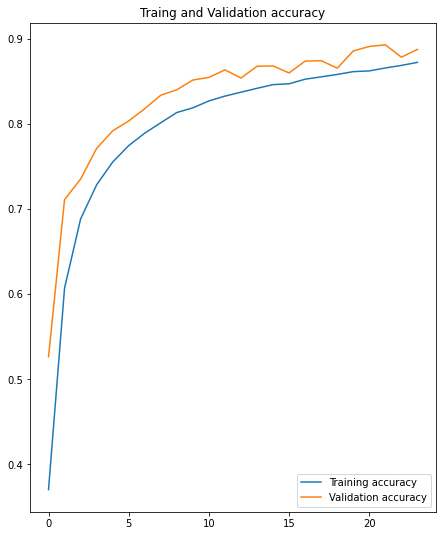

In [35]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.plot(acc,label = 'Training accuracy')
plt.plot(val_acc,label = 'Validation accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Validation accuracy')
plt.show()

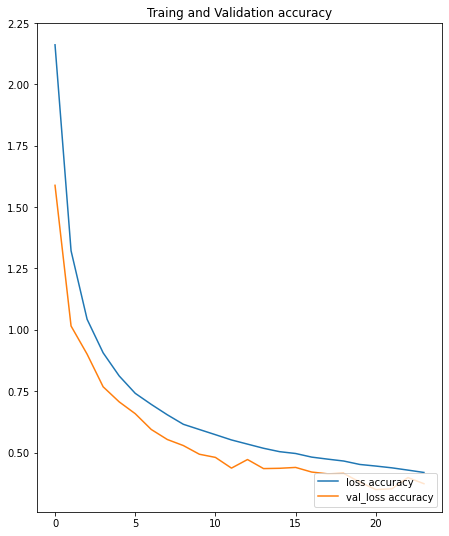

In [36]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.plot(loss,label = 'loss accuracy')
plt.plot(val_loss,label = 'val_loss accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Validation accuracy')
plt.show()

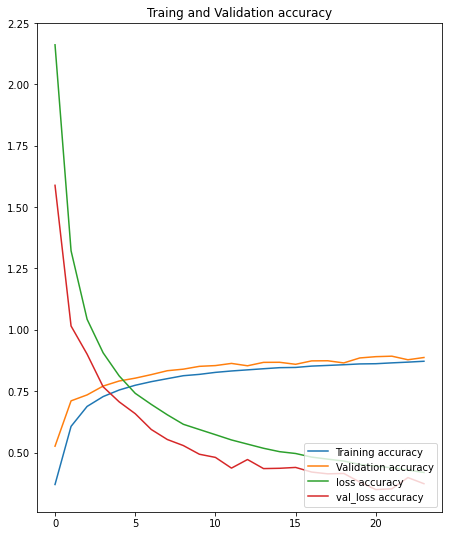

In [37]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.plot(acc,label = 'Training accuracy')
plt.plot(val_acc,label = 'Validation accuracy')
plt.plot(loss,label = 'loss accuracy')
plt.plot(val_loss,label = 'val_loss accuracy')
plt.legend(loc='lower right')
plt.title('Traing and Validation accuracy')
plt.show()

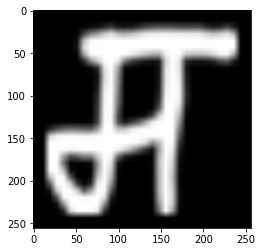

In [38]:
for images_batch,labels_batch in test_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))

In [39]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

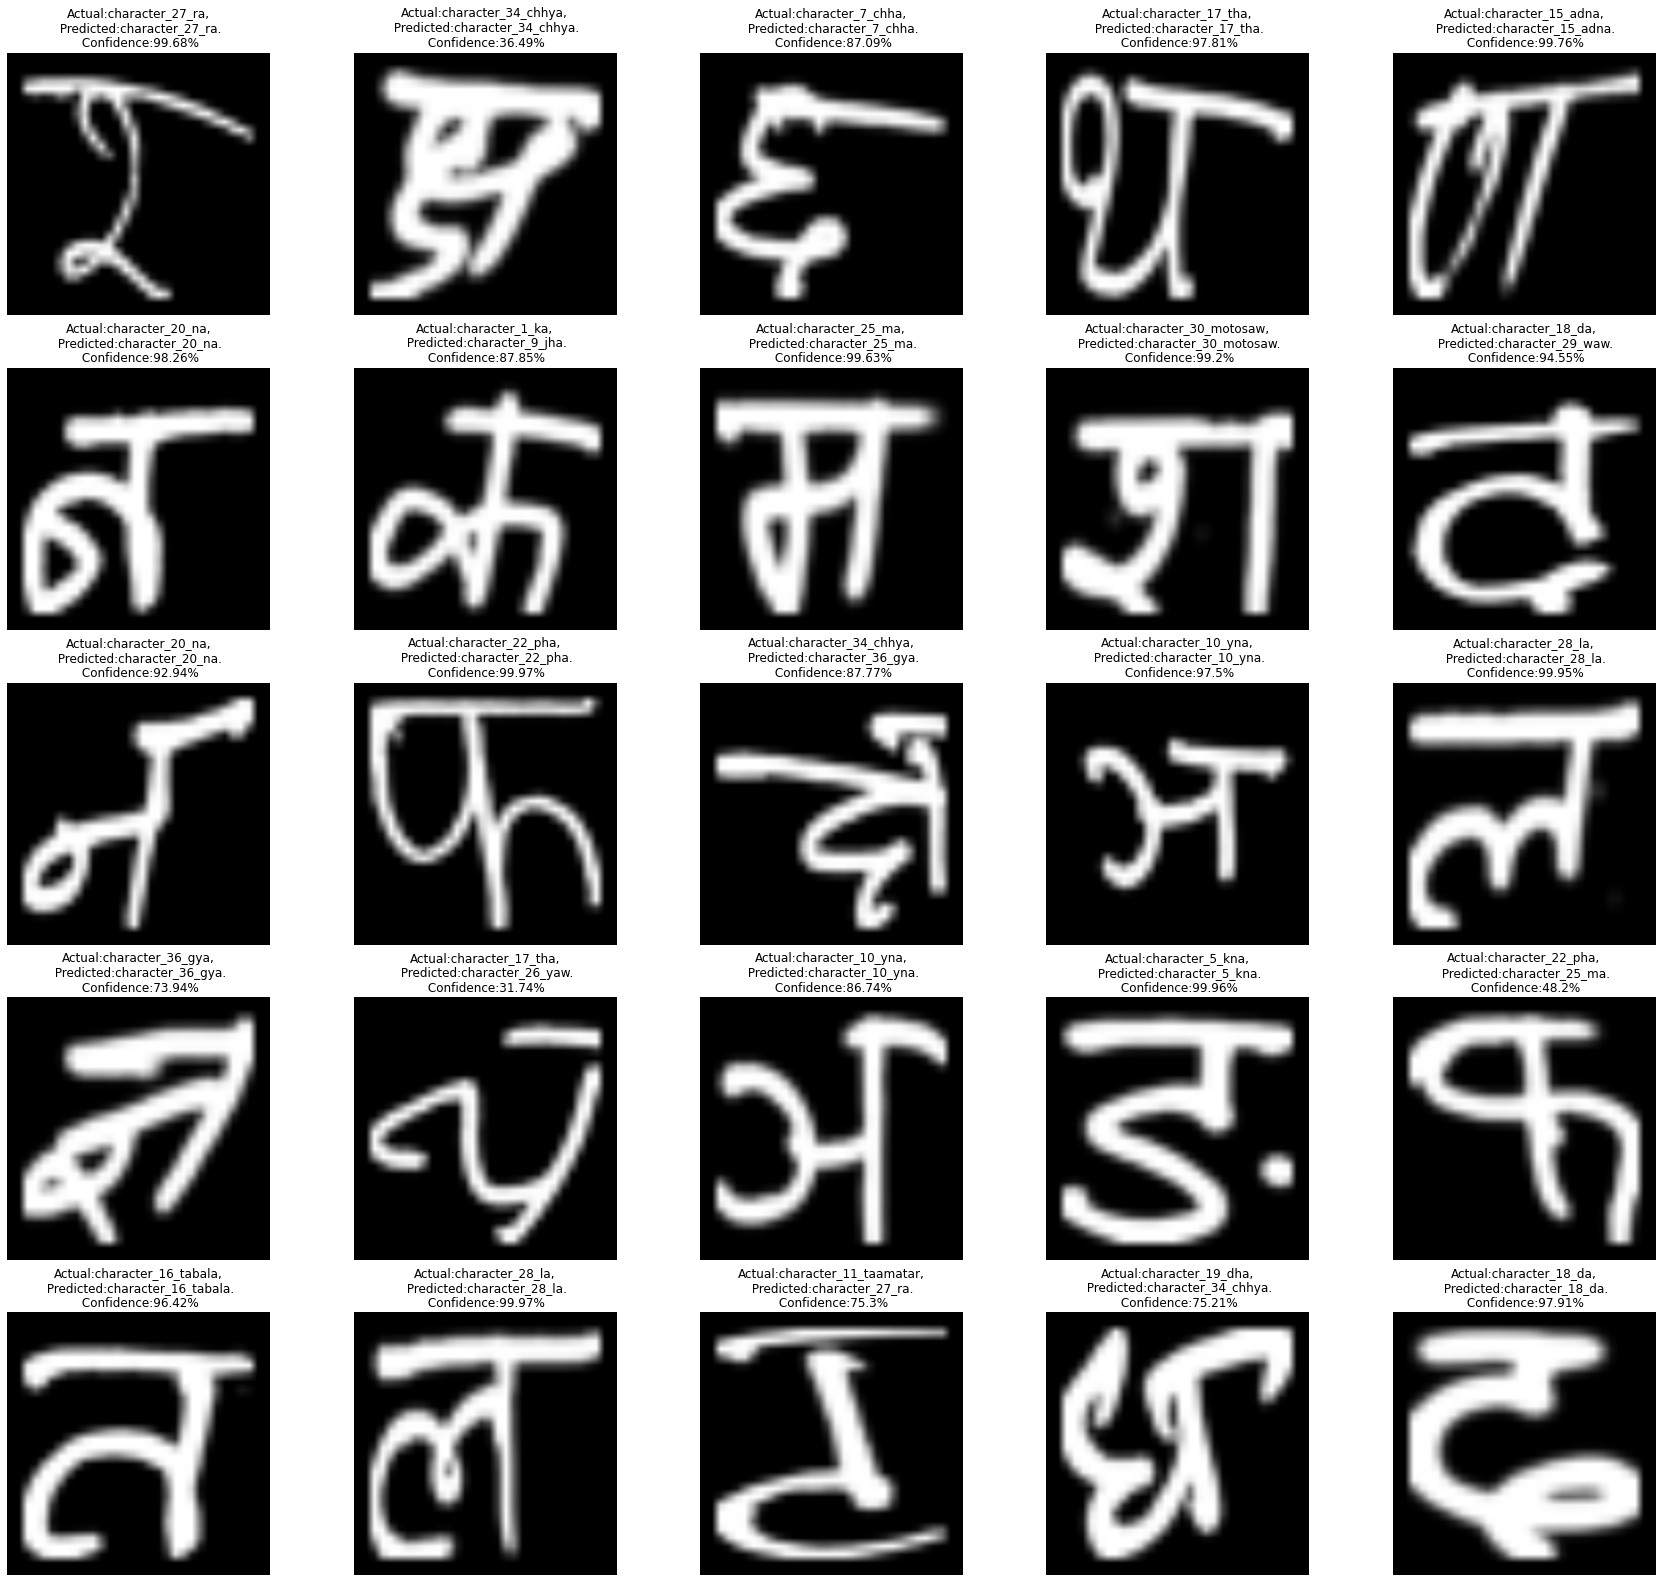

In [40]:
plt.figure(figsize=(30,28))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%",size = 12)
        plt.axis('off')

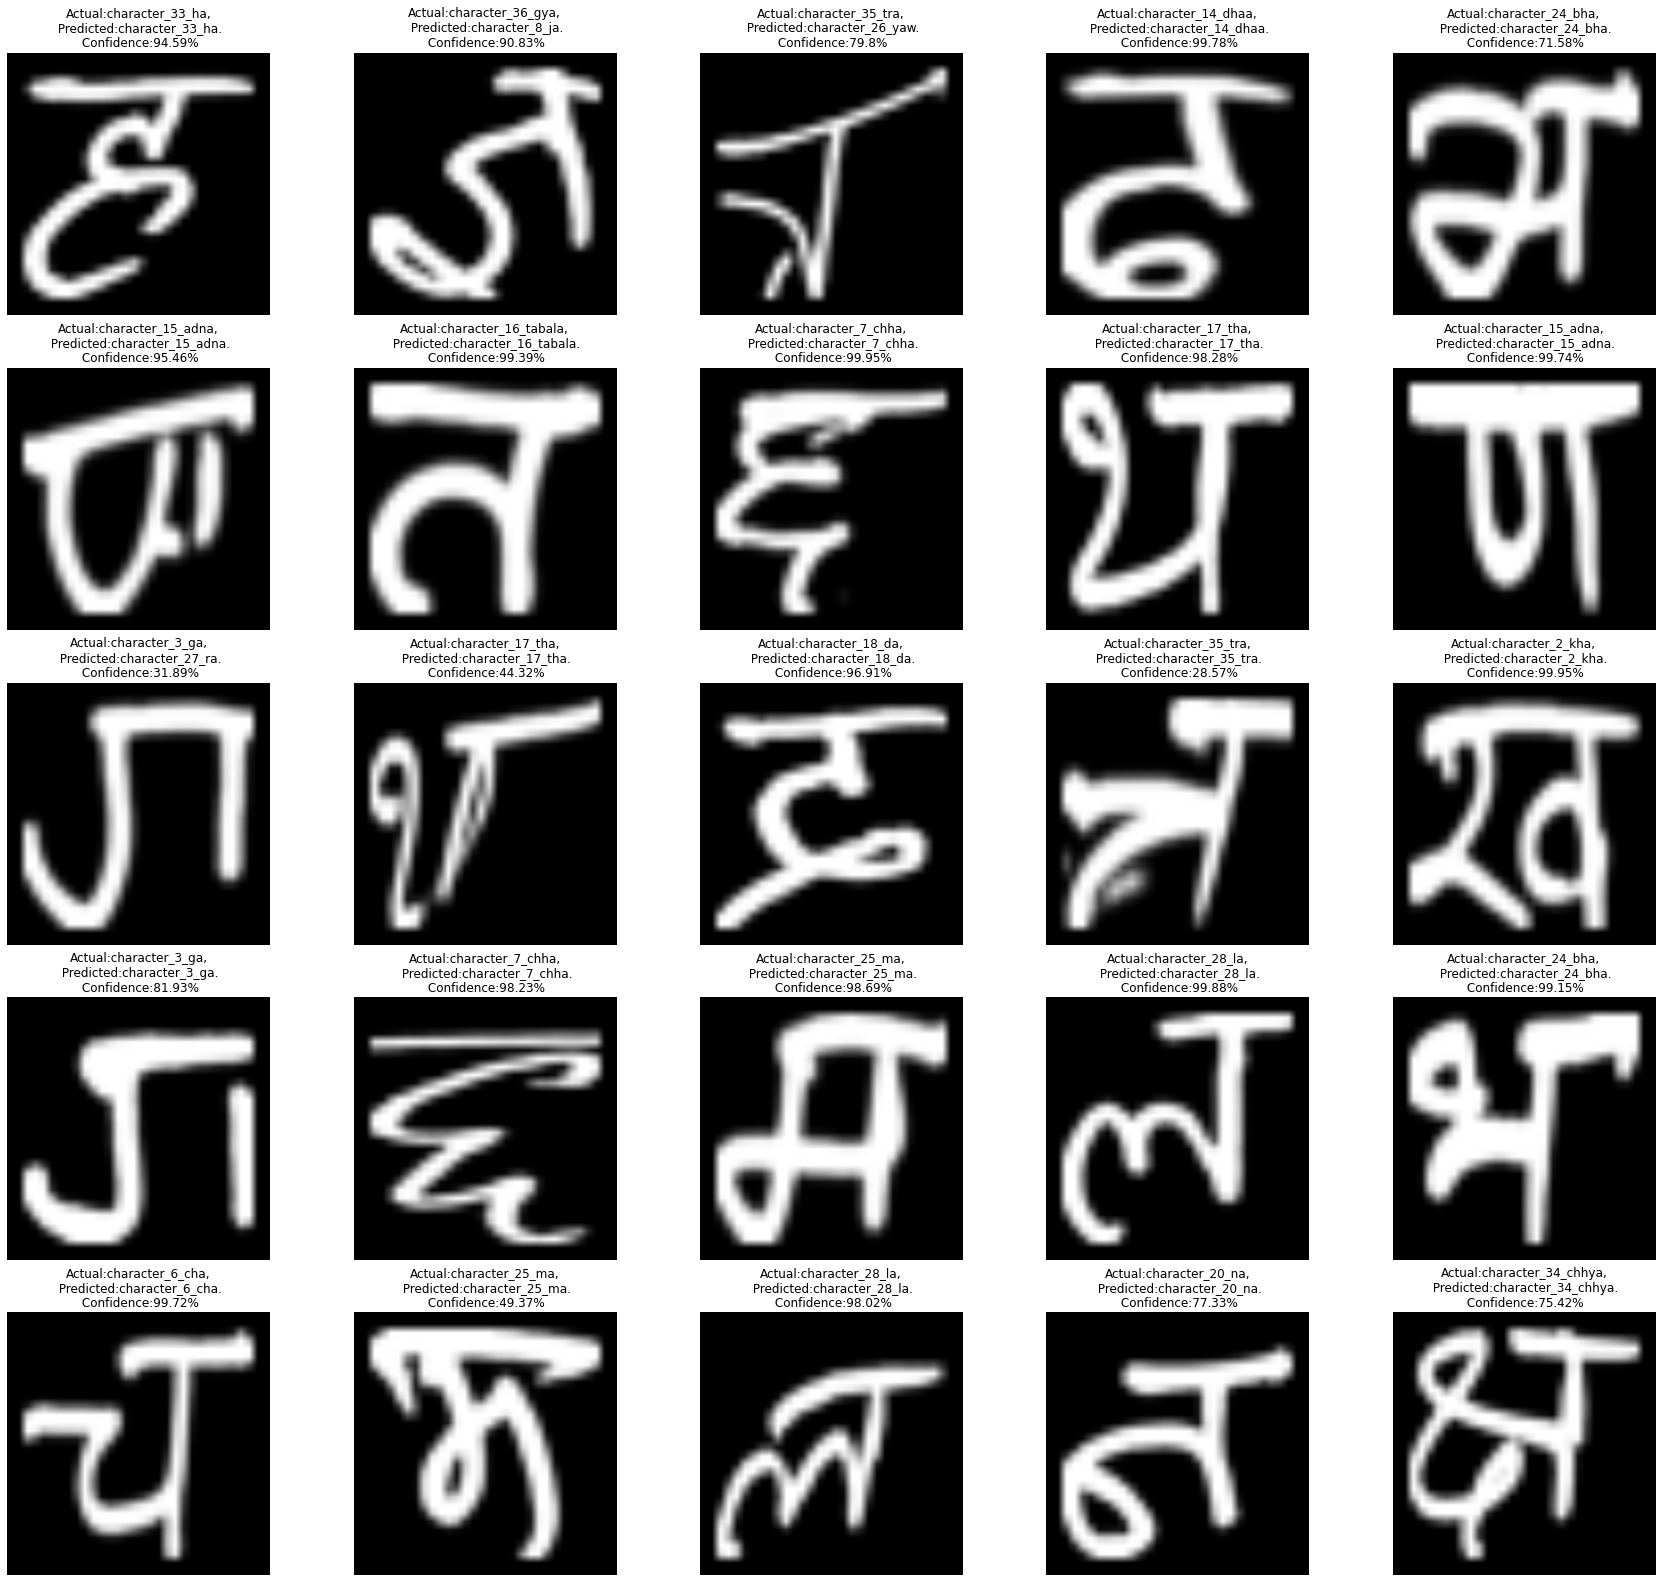

In [41]:
plt.figure(figsize=(30,28))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%",size = 12)
        plt.axis('off')

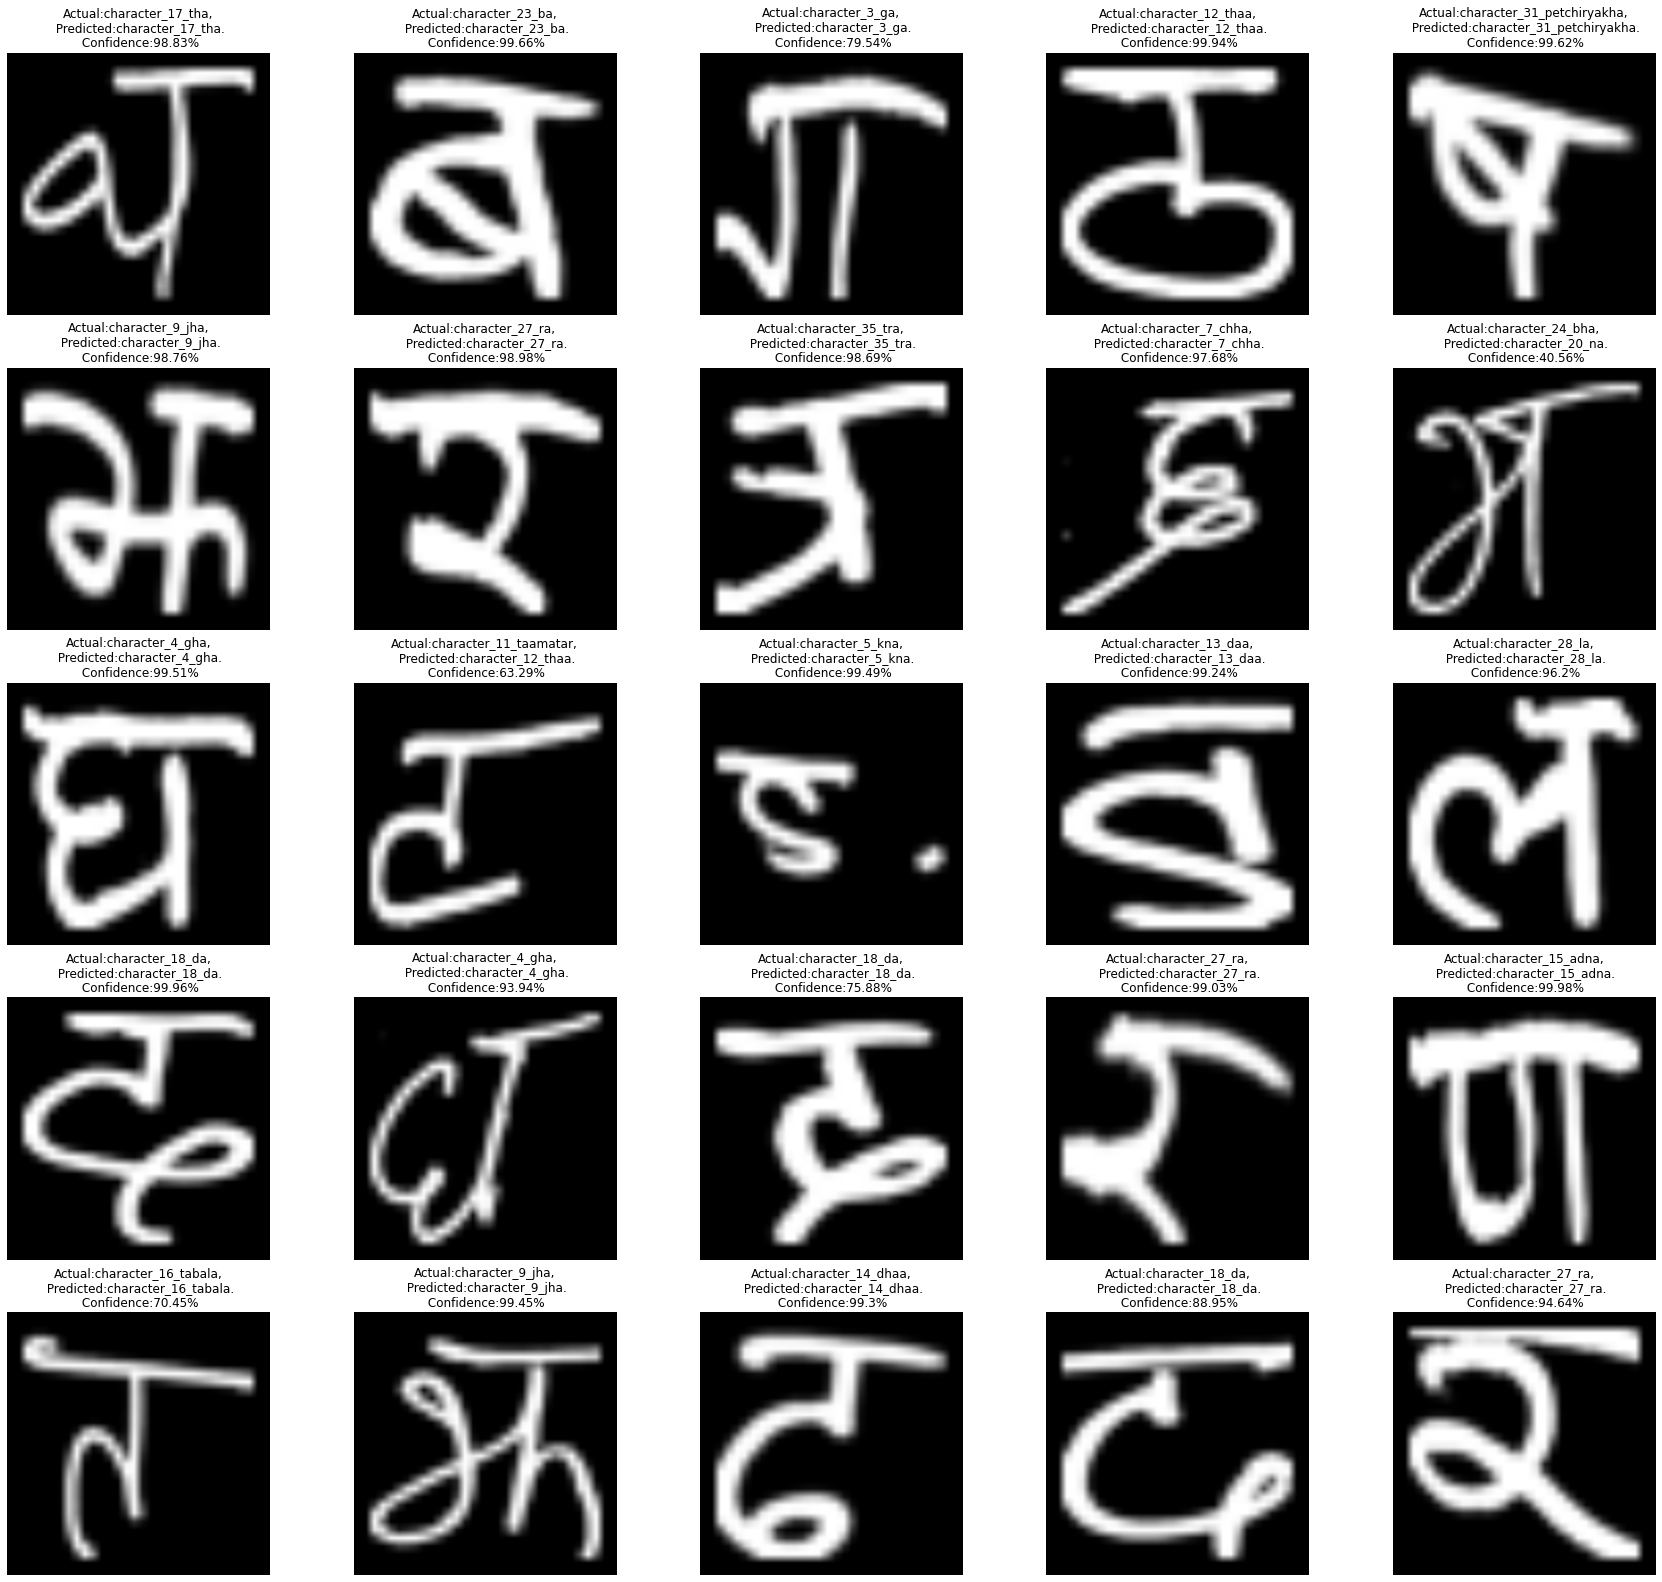

In [42]:
plt.figure(figsize=(30,28))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%",size = 12)
        plt.axis('off')

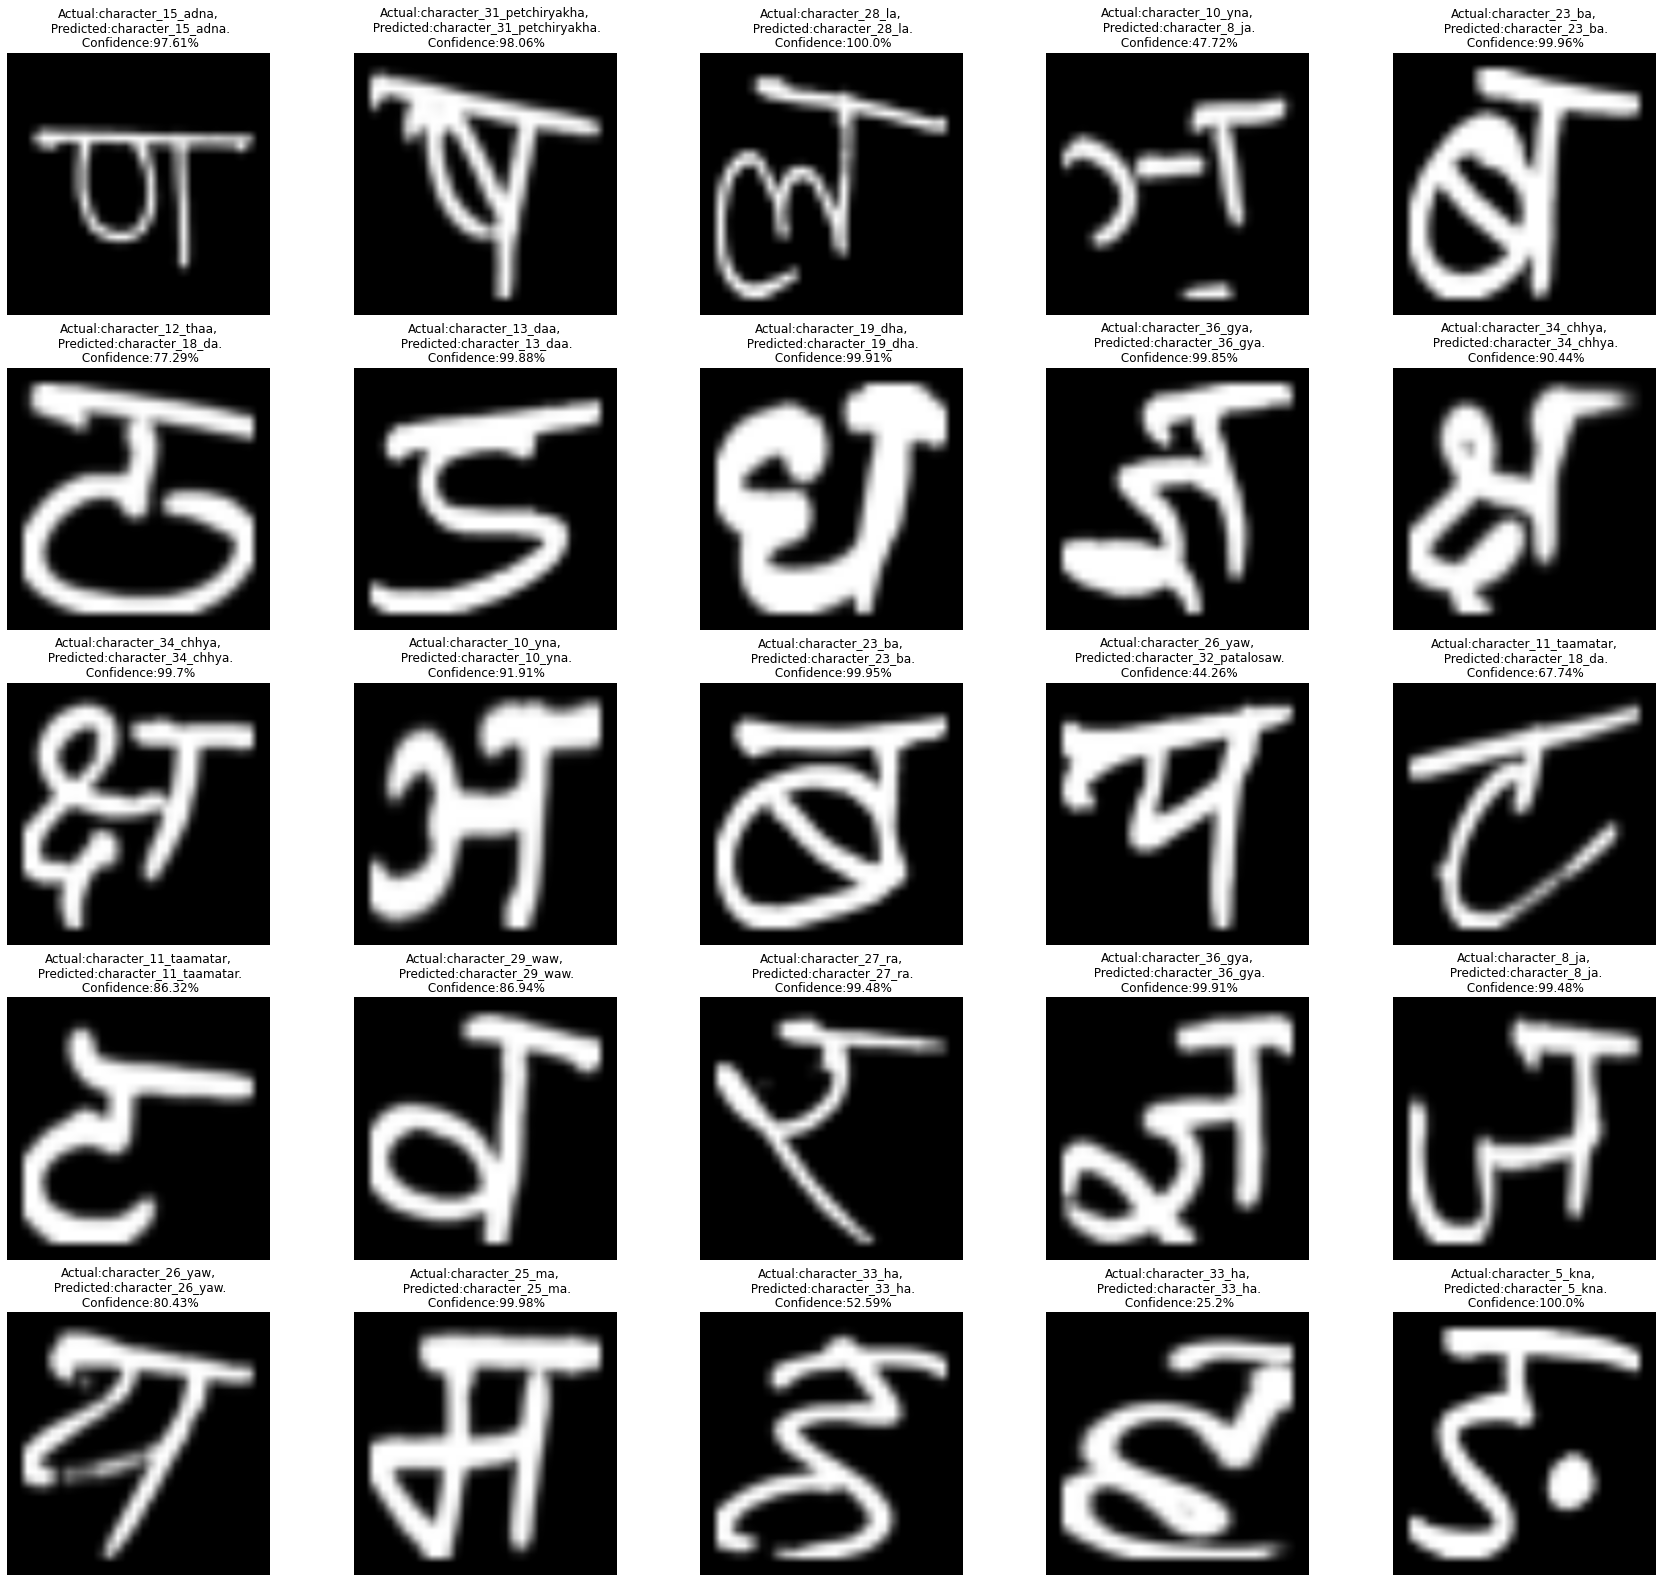

In [43]:
plt.figure(figsize=(30,28))
for images, labels in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%",size = 12)
        plt.axis('off')

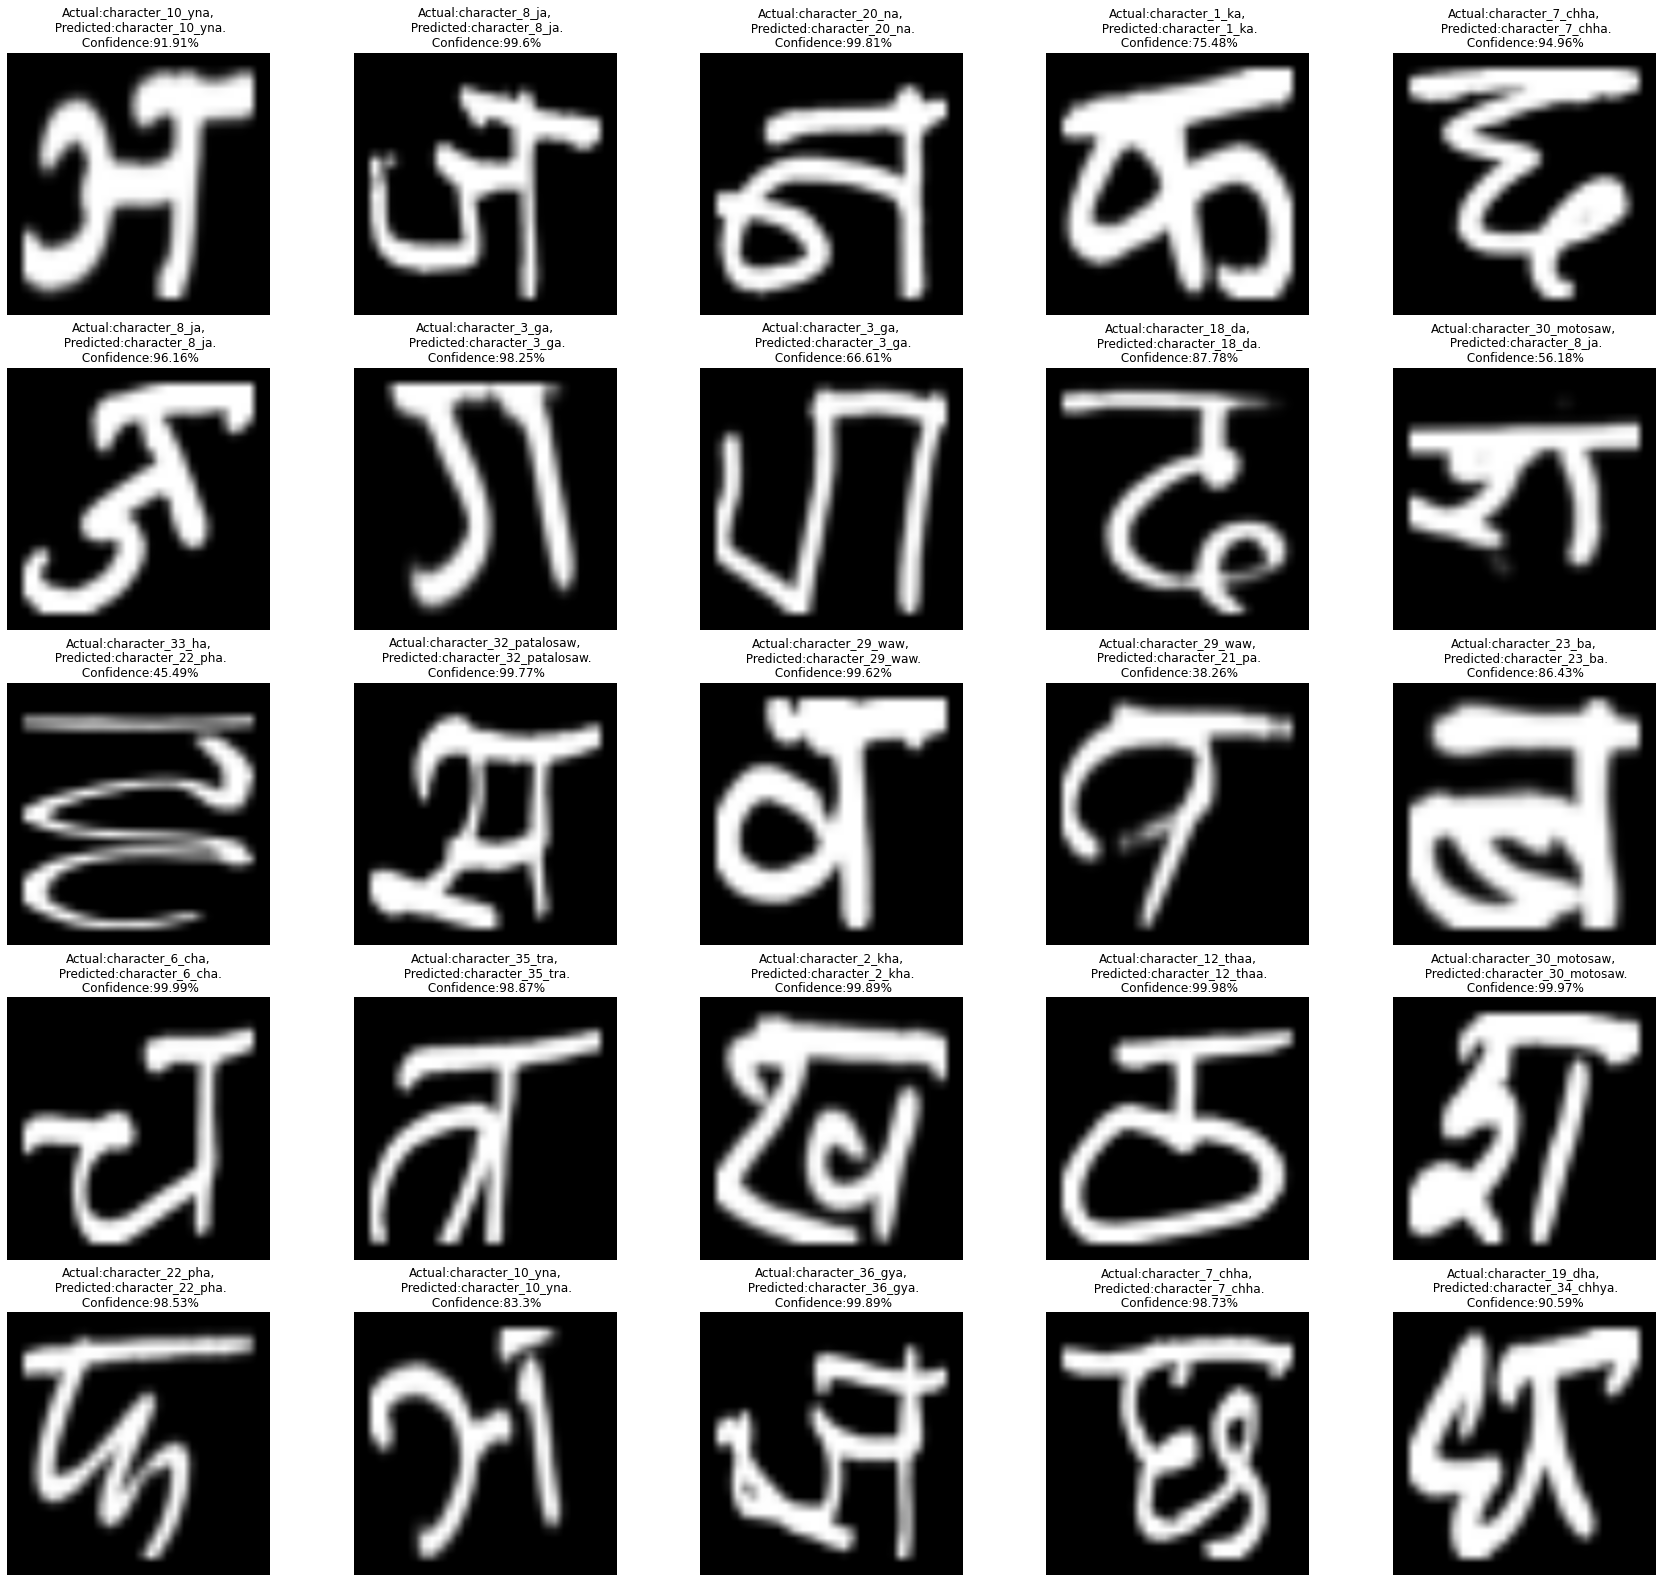

In [44]:
 plt.figure(figsize=(30,28))
for images, labels in test_ds.take(3):
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%",size = 12)
        plt.axis('off')